# Week 3 - Project: Churn Prediction for StreamWorks Media

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Importing the necessary libraries

## Loading the data

In [5]:
data = pd.read_csv("/Users/james/General Documents/Internships:Jobs/Uptrail Data Analyst Internship/Week 3/streamworks_user_data.csv")
data.head() # Loading the data 

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001,56.0,Other,02/04/2025,13/07/2025,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002,69.0,Male,02/01/2023,13/07/2025,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003,46.0,Male,21/08/2022,13/07/2025,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004,32.0,Other,14/09/2023,13/07/2025,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005,60.0,Female,29/07/2023,13/07/2025,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1500 non-null   int64  
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1500 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 164.2+ KB


In [7]:
data.isnull().sum() # Checking for missing values

user_id                   0
age                       3
gender                    1
signup_date               2
last_active_date          0
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

In [8]:
data.describe() # Returning summary statistics

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1500.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.500000,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.157015,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1375.750000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.250000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


Creating the correlation matrix and heatmap for numeric variables:

In [9]:
num_var = data[['user_id', 'age', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'is_churned', 'monthly_fee']] # The numeric variables in a new dataframe
num_var.corr() # The correlation matrix 

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
user_id,1.000000,-0.010414,-0.017853,-0.021639,-0.065488,-0.000597,-0.052613
age,-0.010414,1.000000,0.036806,-0.009936,0.027707,0.002173,-0.001641
average_watch_hours,-0.017853,0.036806,1.000000,-0.004899,-0.013767,-0.004681,-0.021213
mobile_app_usage_pct,-0.021639,-0.009936,-0.004899,1.000000,-0.028562,0.016353,0.022061
complaints_raised,-0.065488,0.027707,-0.013767,-0.028562,1.000000,-0.005118,-0.033150
is_churned,-0.000597,0.002173,-0.004681,0.016353,-0.005118,1.000000,-0.023976
monthly_fee,-0.052613,-0.001641,-0.021213,0.022061,-0.033150,-0.023976,1.000000


<Axes: >

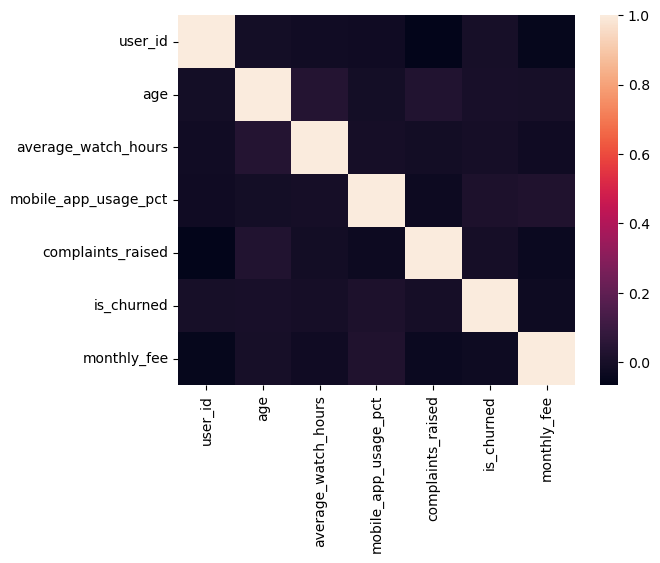

In [10]:
sns.heatmap(num_var.corr()) # The heatmap 

## Cleaning and preparing the data

In [11]:
data['signup_date'] = pd.to_datetime(data['signup_date'], errors='coerce')
data['last_active_date'] = pd.to_datetime(data['last_active_date'], errors='coerce') # Converting signup_date, last_active_date to datetime

/var/folders/58/r1fkngv55hqf7gjlfjjf03v40000gn/T/ipykernel_12026/1680324717.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['signup_date'] = pd.to_datetime(data['signup_date'], errors='coerce')
/var/folders/58/r1fkngv55hqf7gjlfjjf03v40000gn/T/ipykernel_12026/1680324717.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['last_active_date'] = pd.to_datetime(data['last_active_date'], errors='coerce') # Converting signup_date, last_active_date to datetime


Adding new features:

In [12]:
data['tenure_days'] = (data['last_active_date'] - data['signup_date']).dt.days 
data['is_loyal'] = data['tenure_days'] > 180

Label encoding received_promotions and referred_by_friend:

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['received_promotions'] = le.fit_transform(data['received_promotions'])
data['referred_by_friend'] = le.fit_transform(data['referred_by_friend'])
data.head(20)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,0,0,1.0,10.99,159.0,False
1,1002,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,0,1,1.0,5.99,893.0,True
2,1003,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,0,1,1.0,13.99,1057.0,True
3,1004,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,1,1,1.0,13.99,668.0,True
4,1005,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,0,1,0.0,9.99,715.0,True
5,1006,25.0,Male,2023-06-25,2025-07-13,USA,Premium,40.0,24.7,1.0,0,1,0.0,13.99,749.0,True
6,1007,38.0,Male,2023-02-15,2025-07-13,UK,Premium,57.8,83.9,0.0,0,1,0.0,14.99,879.0,True
7,1008,56.0,Male,2022-12-20,2025-07-13,Germany,Premium,9.0,35.6,5.0,0,1,0.0,14.99,936.0,True
8,1009,36.0,Other,2025-05-30,2025-07-13,UK,Standard,11.6,82.7,1.0,0,1,0.0,NaN,44.0,False
9,1010,40.0,Male,2024-07-11,2025-07-13,France,Basic,21.5,70.9,5.0,1,1,0.0,6.99,367.0,True


Handling missing values appropriately

In [14]:
data['age'].fillna("Unknown Age", inplace=True) 
data['gender'].fillna("Unknown Gender", inplace=True)
data['signup_date'].fillna("Unknown Date", inplace=True)
data['country'].fillna("Unknown Country", inplace=True)
data['subscription_type'].fillna("Unknown", inplace=True)
data['average_watch_hours'].fillna("Unknown", inplace=True)
data['mobile_app_usage_pct'].fillna("Unknown", inplace=True)
data['complaints_raised'].fillna("Unknown", inplace=True)
data['received_promotions'].fillna("Unknown", inplace=True)
data['referred_by_friend'].fillna("Unknown", inplace=True)
data['monthly_fee'].fillna("Unknown", inplace=True) # Handling missing values appropriately 

In [15]:
data.isnull().sum() # Checking if all missing values are filled

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              1
monthly_fee             0
tenure_days             2
is_loyal                0
dtype: int64

In [16]:
data['tenure_days'].fillna("Unknown", inplace= True)

## Statistical Analysis and Insights

Chi-squared test on churn:

In [17]:
from scipy.stats import chi2_contingency

In [18]:
table1 = pd.crosstab(data['gender'], data['is_churned']) # Seeing if churn is related to gender
chi2, p, dof, expected = chi2_contingency(table1) # Chi squared test
print(f"Chi-squared Statistic = {chi2}")
print(f"Degrees of Freedom = {dof}")
print(f"p-value = {p}")
if p < 0.05:
    print("There is a statistically significant relationship.")
else:
    print("No statistically significant relationship.")

Chi-squared Statistic = 7.433261106704834
Degrees of Freedom = 3
p-value = 0.059298284977021457
No statistically significant relationship.


In [19]:
table1 = pd.crosstab(data['received_promotions'], data['is_churned']) # Seeing if churn is related to received_promotions
chi2, p, dof, expected = chi2_contingency(table1)
print(f"Chi-squared Statistic = {chi2}")
print(f"Degrees of Freedom = {dof}")
print(f"p-value = {p}")
if p < 0.05:
    print("There is a statistically significant relationship.")
else:
    print("No statistically significant relationship.")

Chi-squared Statistic = 12.166283858704752
Degrees of Freedom = 2
p-value = 0.0022809986458334525
There is a statistically significant relationship.


In [20]:
table1 = pd.crosstab(data['referred_by_friend'], data['is_churned']) # Seeing if churn is related to referred_by_friend
chi2, p, dof, expected = chi2_contingency(table1)
print(f"Chi-squared Statistic = {chi2}")
print(f"Degrees of Freedom = {dof}")
print(f"p-value = {p}")
if p < 0.05:
    print("There is a statistically significant relationship.")
else:
    print("No statistically significant relationship.")

Chi-squared Statistic = 1.4108617059076312
Degrees of Freedom = 2
p-value = 0.49389573197257386
No statistically significant relationship.


In [21]:
pd.crosstab(data['received_promotions'], data['is_churned'])

is_churned,0.0,1.0
received_promotions,,
0,573,190
1,575,158
2,0,3


From the above table, the churn rate for those who didn't receive promotions is slightly higher than those that did. 

Performing a t-test to check if watch time differs significantly between churned and retained users:

In [22]:
from scipy.stats import ttest_ind

In [23]:
data['average_watch_hours'] = pd.to_numeric(data['average_watch_hours'], errors='coerce')
data_clean = data.dropna(subset=['average_watch_hours']) # Dropping null values in average watch hours column which will affect the test

In [24]:
churned = data_clean[data_clean['is_churned'] == 1]['average_watch_hours']
retained = data_clean[data_clean['is_churned'] == 0]['average_watch_hours']

In [25]:
t_stat, p_value = ttest_ind(churned, retained, equal_var=False) # Performing the t-test 

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in average watch time between churned and retained users.")
else:
    print("No significant difference in average watch time between the groups.")

T-statistic: -0.17950606293214347
P-value: 0.8576039445893948
No significant difference in average watch time between the groups.


Visuals in key differences between churned and retained users:

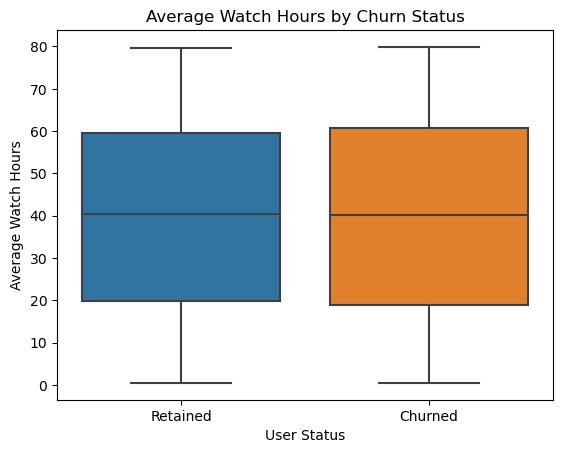

In [26]:
sns.boxplot(data=data_clean, x='is_churned', y='average_watch_hours')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.title('Average Watch Hours by Churn Status')
plt.ylabel('Average Watch Hours')
plt.xlabel('User Status')
plt.show()

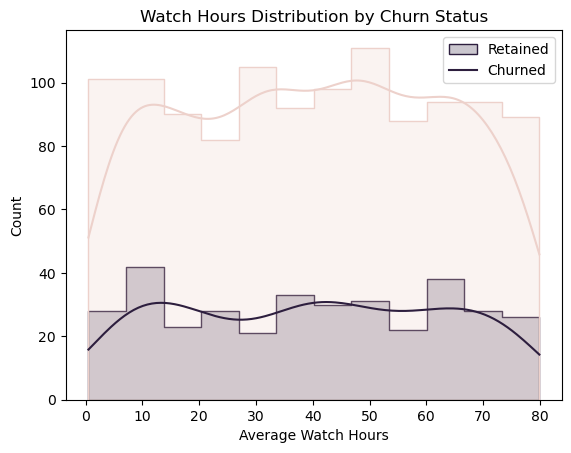

In [27]:
sns.histplot(data=data_clean, x='average_watch_hours', hue='is_churned', kde=True, element='step')
plt.xticks()
plt.title('Watch Hours Distribution by Churn Status')
plt.xlabel('Average Watch Hours')
plt.legend(labels=['Retained', 'Churned'])
plt.show()

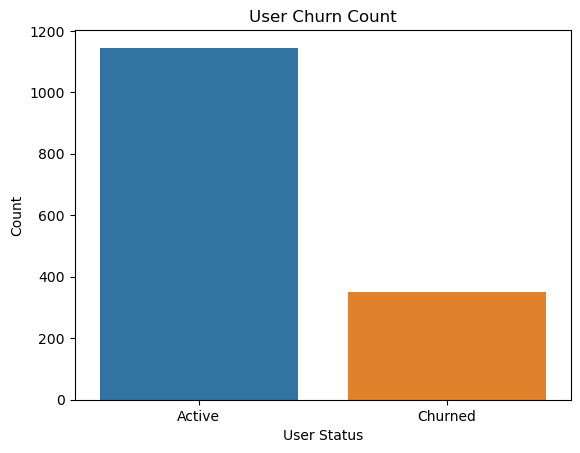

In [28]:
sns.countplot(data=data_clean, x='is_churned')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.title('User Churn Count')
plt.ylabel('Count')
plt.xlabel('User Status')
plt.show()

## Predictive Modelling

Logistic Regression model to predict is_churned:

In [29]:
# Data prep
features = ['average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'monthly_fee', 'age']
X = data_clean[features]
y = data_clean['is_churned']


In [30]:
# Data cleaning for the modelling
X = data_clean[features].apply(pd.to_numeric, errors='coerce')

# Dropping rows with NaNs in either X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

In [31]:
# Train-test split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(random_state=42) # Model creation
log_model.fit(X_train_scaled, y_train) # Model training

y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1] # Making predictions

In [32]:
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 

Model Accuracy: 0.7323420074349443
Confusion Matrix:
 [[197   0]
 [ 72   0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85       197
         1.0       0.00      0.00      0.00        72

    accuracy                           0.73       269
   macro avg       0.37      0.50      0.42       269
weighted avg       0.54      0.73      0.62       269



/Users/james/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/james/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/james/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
coeffs = pd.Series(log_model.coef_[0], index=features) # The coefficients
print("Feature Importances:\n", coeffs.sort_values(ascending=False))

Feature Importances:
 age                     0.039117
mobile_app_usage_pct   -0.006595
complaints_raised      -0.009264
monthly_fee            -0.044781
average_watch_hours    -0.053853
dtype: float64


Test model here with realistic cases

Visuals:

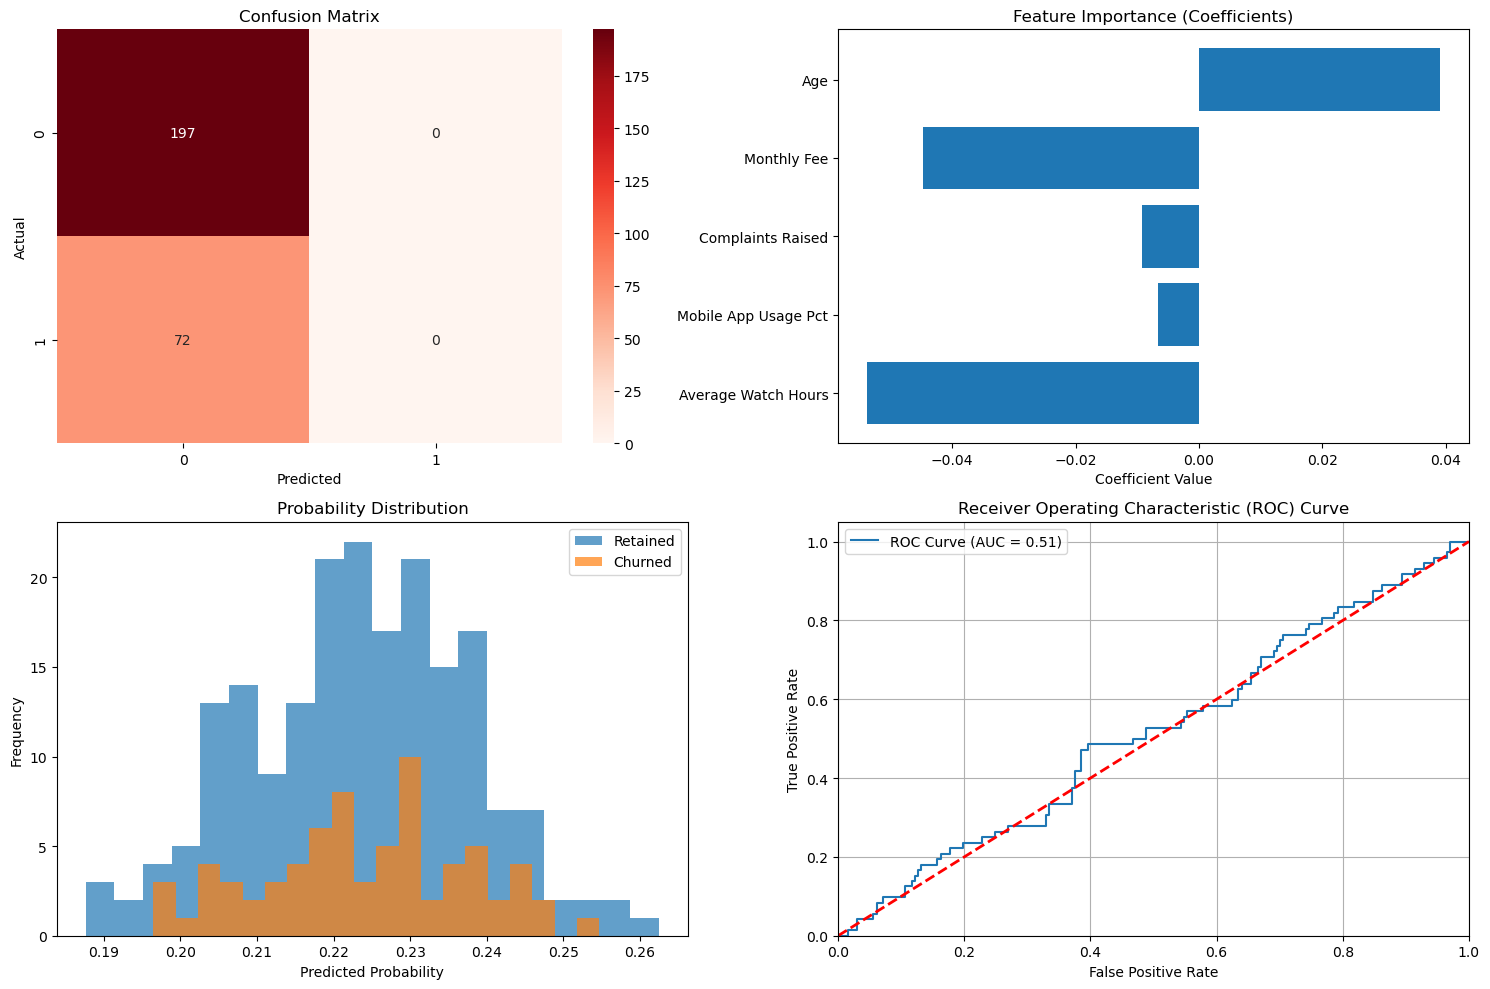

In [34]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # For the ROC curve below

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Feature Importance
feature_names = ['Average Watch Hours', 'Mobile App Usage Pct', 'Complaints Raised', 'Monthly Fee', 'Age']
coefficients = log_model.coef_[0]
axes[0,1].barh(feature_names, coefficients)
axes[0,1].set_title('Feature Importance (Coefficients)')
axes[0,1].set_xlabel('Coefficient Value')

# Probability Distribution
axes[1,0].hist(y_pred_proba[y_test==0], alpha=0.7, label='Retained', bins=20)
axes[1,0].hist(y_pred_proba[y_test==1], alpha=0.7, label='Churned', bins=20)
axes[1,0].set_title('Probability Distribution')
axes[1,0].set_xlabel('Predicted Probability')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# ROC curve
axes[1,1].plot(fpr,tpr,label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[1,1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
axes[1,1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_xlim([0,1])
axes[1,1].set_ylim([0,1.05])
axes[1,1].grid(True)
axes[1,1].legend()

plt.tight_layout()
plt.show()

## Tuning Logistic Regression Hyperparameters

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(max_iter=5000, class_weight='balanced'))
])

In [44]:
param_grid = {
    'logreg__C': np.logspace(-4, 4, 20),       # inverse regularization strength
    'logreg__penalty': ['l1', 'l2'],           # Lasso vs Ridge
    'logreg__solver': ['liblinear', 'saga']    # solvers that support l1
}

In [ ]:
grid = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5,  # 5 fold cross validation
    scoring='roc_auc',   # Better for churn (class imbalance often present)
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=5000))]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [47]:
print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)
print("Test ROC-AUC:", grid.score(X_test, y_test))

Best Parameters: {'logreg__C': 0.0001, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best CV ROC-AUC: 0.5
Test ROC-AUC: 0.5
